In [1]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cell_anno = pd.read_csv("../../../results/data_preprocessing/Lasry/preprocessed/anno_cells_corr.txt", delimiter="\t")

/tmp/ipykernel_52586/3978655546.py:1: DtypeWarning: Columns (22,26,27,28,29,30,32,33,34,35,36,37,38,41,42,43,44,47,48,50,55,57,58,61,65,67,68,70) have mixed types. Specify dtype option on import or set low_memory=False.
  cell_anno = pd.read_csv("../../../results/data_preprocessing/Lasry/preprocessed/anno_cells_corr.txt", delimiter="\t")


In [3]:
# Read in the CellPhoneDB results CSV file and set the interaction column as the index.
# Any missing values (NaNs) in the dataframe are filled with zeros.
# These missing values are due to merged samples.

cpdb = pd.read_csv('../../../results/method_comparison/compare_results/CPDB/CPDB_results.csv', index_col=None)
cpdb = cpdb.fillna(0)
cpdb.set_index("interaction", inplace=True)

In [4]:
# Read in the NicheNet results CSV file and set the interaction column as the index.
# Any missing values (NaNs) in the dataframe are filled with zeros.
# These missing values are due to merged samples.
nnet = pd.read_csv("../../../results/method_comparison/compare_results/NicheNet/NicheNet_results.csv")
nnet = nnet.fillna(0)
nnet.set_index("interaction", inplace=True)

In [5]:
community = pd.read_csv("../../../results/method_comparison/compare_results/community/community_results.csv")
community.rename(columns={"Unnamed: 0": "interaction"}, inplace=True)
community.set_index("interaction", inplace=True)

In [28]:
# Create a list of column names in the dataframe that contain the string "healthy"
healthy = cell_anno[cell_anno["health_status"]=="healthy"].sample_ID.unique()

# Create a list of column names in the dataframe that contain the string "AML"
AML = cell_anno[cell_anno["health_status"]=="AML"].sample_ID.unique()


In [29]:
# drop the raw if all the values are zero
def drop_zeros(df):
    return df.loc[~(df==0).all(axis=1)]

In [30]:
# Create two new dataframes by separating the `community` dataframe into case and control groups based on column names.
# `community_control` contains only the columns from `community` that contain the string "healthy",
# while `community_case` contains only the columns from `community` that contain the string "AML".

community_control=community[healthy]
community_control=drop_zeros(community_control)
community_case=community[AML]
community_case=drop_zeros(community_case)

In [31]:
# same step for NicheNet
nnet_control=nnet[healthy]
nnet_control=drop_zeros(nnet_control)
nnet_case=nnet[AML]
nnet_case=drop_zeros(nnet_case)

In [32]:
# same step for CellPhoneDB
cpdb_control=cpdb[healthy]
cpdb_control=drop_zeros(cpdb_control)
cpdb_case=cpdb[AML]
cpdb_case=drop_zeros(cpdb_case)

In [33]:
# Each column contains a list of two values: the number of interactions in the case group and the control group


plotdata = pd.DataFrame({

    "community":[len(community_case),len(community_control)],

    "NicheNet":[len(nnet_case),len(nnet_control)],

    "CPDB":[len(cpdb_case),len(cpdb_control)]},

    index=["case", "control"])

In [34]:
plotdata

,community,NicheNet,CPDB
case,16381,22020,98100
control,14386,14802,98602


Text(0, 0.5, '# of interactions')

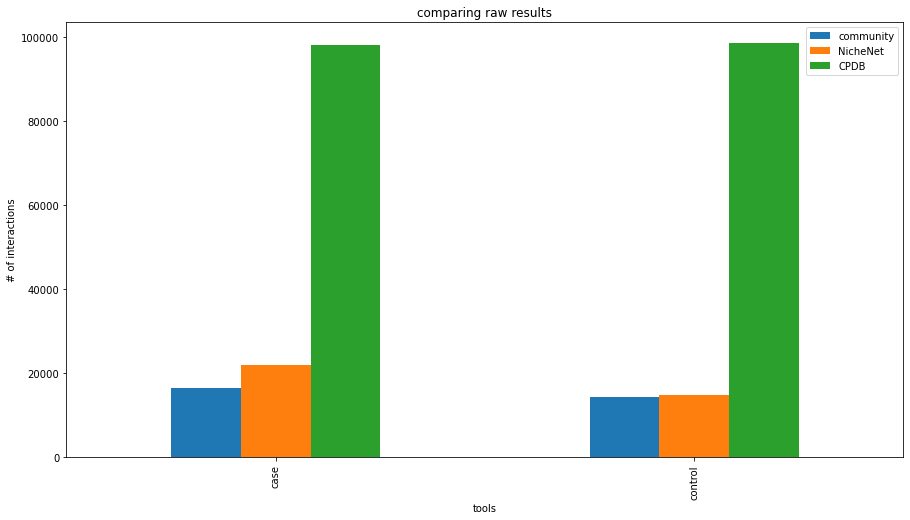

In [35]:
plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("comparing raw results")

plt.xlabel("tools")

plt.ylabel("# of interactions")

In [36]:
# get the list of interaction in the control group for CellPhoneDB
cpdb_control_interactions = cpdb_control.index.values.tolist()

In [37]:
# get the list of interaction in the control group for NicheNet
nnet_control_interactions = nnet_control.index.values.tolist()

In [38]:
community_control_interactions = community_control.index.values.tolist()

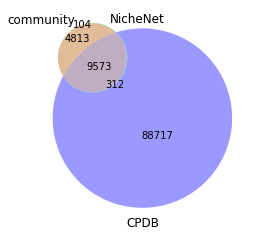

In [39]:
# plot the interactions in the control samples
venn3([set(community_control_interactions),set(nnet_control_interactions), set(cpdb_control_interactions)], ("community",'NicheNet', 'CPDB'))

In [40]:
cpdb_case_interactions = cpdb_case.index.values.tolist()
nnet_case_interactions = nnet_case.index.values.tolist()
community_case_interactions = community_case.index.values.tolist()

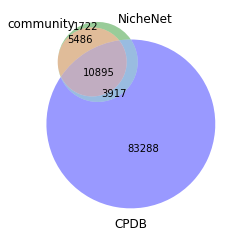

In [41]:
# plot the interactions in the case samples

venn3([set(community_case_interactions),set(nnet_case_interactions), set(cpdb_case_interactions)], ("community",'NicheNet', 'CPDB'))
plt.savefig('compare_case_interactions.png')

In [42]:
control = dict()

for x in cpdb_control_interactions + nnet_control_interactions + community_control_interactions:
    if x in control:
        control[x] += 1
    else:
        control[x] = 1

In [43]:
case = dict()

for x in cpdb_case_interactions + nnet_case_interactions + community_case_interactions:
    if x in case:
        case[x] += 1
    else:
        case[x] = 1

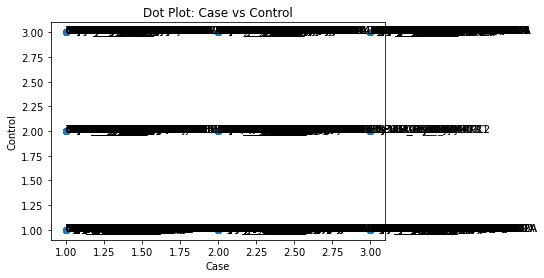

In [44]:
# # Find common keys (interactions)
# common_interactions = list(set(case.keys()) & set(control.keys()))

# # Extract values for common interactions
# case_values = [case[interaction] for interaction in common_interactions]
# control_values = [control[interaction] for interaction in common_interactions]

# # Create the dot plot
# plt.scatter(case_values, control_values)

# # Annotate each point with the interaction name
# for i, interaction in enumerate(common_interactions):
#     plt.annotate(interaction, (case_values[i], control_values[i]))

# # Label axes and add a title
# plt.xlabel('Case')
# plt.ylabel('Control')
# plt.title('Dot Plot: Case vs Control')

# # Display the plot
# plt.show()

In [45]:
# just wanna get a quick glance at interactions that are in CPDB but not in community
not_in_commu=list(set(cpdb_case_interactions) - set(community_case_interactions))

In [46]:
cpdb_case[cpdb_case.index.isin(not_in_commu)]

,AML-0024,AML-0160,AML-0693,AML-1371,AML-2123,AML-3133,AML-4340
interaction,,,,,,,
B:GNAS_B:ADRB2,0.438,0.0,0.369,0.488,0.000,0.000,0.518
B:GNAS_Ery:ADRB2,0.446,0.0,0.000,0.000,0.524,0.000,0.000
DC:GNAS_B:ADRB2,0.522,0.0,0.498,0.517,0.000,0.000,0.605
DC:GNAS_Ery:ADRB2,0.529,0.0,0.000,0.000,0.000,0.000,0.000
Ery:GNAS_B:ADRB2,0.360,0.0,0.316,0.324,0.000,0.000,0.000
...,...,...,...,...,...,...,...
Gran:COL4A5_NK:DDR2,0.000,0.0,0.000,0.007,0.000,0.000,0.000
HSPC:COL4A5_NK:DDR2,0.000,0.0,0.000,0.024,0.000,0.000,0.035
Gran:COL4A5_NK:CD47,0.000,0.0,0.000,0.259,0.000,0.000,0.000


In [47]:
len(cpdb_case)

98100

In [48]:
# Below function 
# Standardizes the values in the dataframe by subtracting the mean and dividing by the standard deviation.
# Calculates the mean value of each row and adds it as a new column to the dataframe.
# Calculates the overall mean value of the mean column.
# Returns a new dataframe that includes only rows with mean values greater than the overall mean value.

def drop_low(df):
    # Standardize the values in the dataframe by subtracting the mean and dividing by the standard deviation
    df = (df - df.mean()) / df.std()
    
    # Calculate the mean value of each row and add it as a new column to the dataframe
    df['mean'] = df.mean(axis=1)
    
    # Calculate the overall mean value of the mean column
    mean_value = df['mean'].mean()
    
    # Return a new dataframe that includes only rows with mean values greater than the overall mean value
    return df[df['mean'] > mean_value]


In [49]:
# apply the function above
cpdb_case_norm=drop_low(cpdb_case)
nnet_case_norm=drop_low(nnet_case)
community_case_norm=drop_low(community_case)

In [50]:
# apply the function above
cpdb_control_norm=drop_low(cpdb_control)
nnet_control_norm=drop_low(nnet_control)
community_control_norm=drop_low(community_control)

In [51]:
cpdb_case_interactions = cpdb_case_norm.index.values.tolist()
nnet_case_interactions = nnet_case_norm.index.values.tolist()
community_case_interactions = community_case_norm.index.values.tolist()

In [52]:
cpdb_control_interactions = cpdb_control_norm.index.values.tolist()
nnet_control_interactions = nnet_control_norm.index.values.tolist()
community_control_interactions = community_control_norm.index.values.tolist()

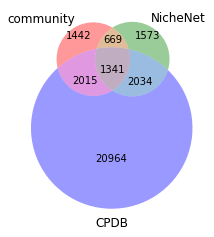

In [53]:
venn3([set(community_case_interactions),set(nnet_case_interactions), set(cpdb_case_interactions)], ("community",'NicheNet', 'CPDB'))
plt.savefig('compare_case_interactions_norm.png')


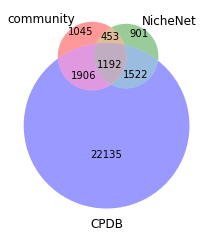

In [54]:
venn3([set(community_control_interactions),set(nnet_control_interactions), set(cpdb_control_interactions)], ("community",'NicheNet', 'CPDB'))
plt.savefig('compare_control_interactions_norm.png')


In [55]:
cpdb_case_norm=cpdb_case_norm.drop("mean", axis=1)
cpdb_control_norm=cpdb_control_norm.drop("mean", axis=1)

In [56]:
# Each column contains a list of two values: the number of interactions in the case group and the control group


plotdata = pd.DataFrame({

    "community":[len(community_case_norm),len(community_control_norm)],

    "NicheNet":[len(nnet_case_norm),len(nnet_control_norm)],

    "CPDB":[len(cpdb_case_norm),len(cpdb_control_norm)]},

    index=["case", "control"])

In [57]:
plotdata

,community,NicheNet,CPDB
case,5467,5617,26354
control,4596,4068,26755


Text(0, 0.5, '# of interactions')

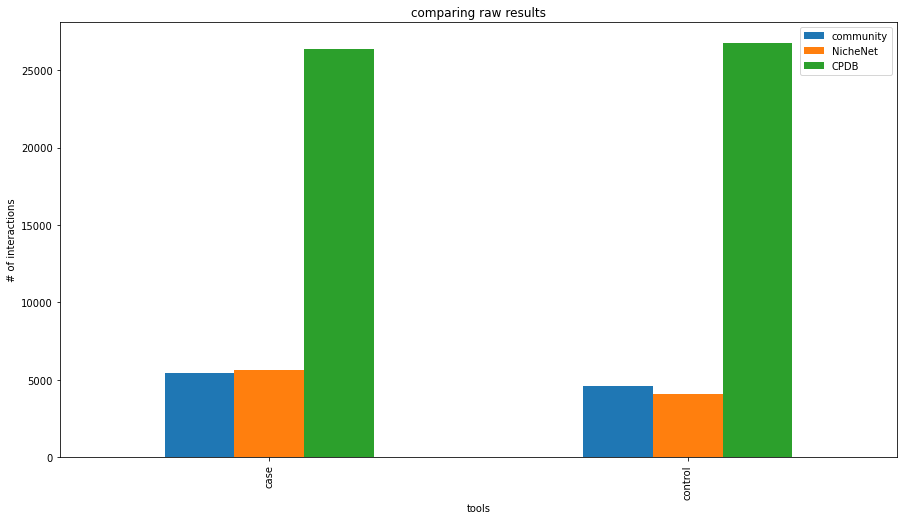

In [58]:
plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("comparing raw results")

plt.xlabel("tools")

plt.ylabel("# of interactions")

In [59]:
cpdb_control

,healthy-1,healthy-2,healthy-3,healthy-4,healthy-4003,healthy-5
interaction,,,,,,
B:GNAS_B:ADRB2,0.457,0.524,0.461,0.450,0.353,0.350
B:GNAS_DC:ADRB2,0.484,0.536,0.466,0.485,0.368,0.356
B:GNAS_Ery:ADRB2,0.000,0.000,0.000,0.000,0.000,0.350
B:GNAS_Gran:ADRB2,0.478,0.546,0.480,0.469,0.390,0.365
B:GNAS_HSPC:ADRB2,0.458,0.521,0.462,0.445,0.369,0.357
...,...,...,...,...,...,...
T:BMP3_Gran:ACVR1B,0.021,0.000,0.000,0.000,0.028,0.000
T:BMP3_HSPC:ACVR1B,0.012,0.000,0.000,0.000,0.021,0.000
T:BMP3_Mono:ACVR1B,0.027,0.000,0.000,0.000,0.021,0.000


In [60]:
cpdb_case_norm

,AML-0024,AML-0160,AML-0693,AML-1371,AML-2123,AML-3133,AML-4340
interaction,,,,,,,
B:GNAS_B:ADRB2,1.624994,-0.402515,1.642566,1.684889,-0.428483,-0.484927,2.173536
B:GNAS_DC:ADRB2,-0.494593,3.087017,1.696035,2.097871,-0.428483,-0.484927,2.168403
B:GNAS_Ery:ADRB2,1.663707,-0.402515,-0.549688,-0.579550,2.484065,-0.484927,-0.485619
B:GNAS_Gran:ADRB2,1.654029,3.129205,1.779210,2.209236,-0.428483,-0.484927,-0.485619
B:GNAS_HSPC:ADRB2,-0.494593,-0.402515,1.672271,2.116432,2.484065,1.804884,2.168403
...,...,...,...,...,...,...,...
NK:ITGB1_B:COL4A4,-0.494593,-0.402515,0.721700,1.169822,0.966650,0.303369,-0.485619
NK:CD44_B:COL4A4,-0.494593,-0.402515,0.139476,1.141980,1.389081,0.753823,-0.485619
T:CXCR6_Mono:CXCL16,-0.494593,-0.402515,0.133534,-0.073764,0.366354,0.802086,0.351142
